In [2]:
import pandas as pd, tensorflow as tf, matplotlib.pyplot as plt, numpy as np
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import mean_squared_error
from   math import sqrt

#Big Data Import
db=pd.read_excel('DRB.xlsx')

#Data Extraction
y1 = db ["As_opt"]
y2 = db ["d_opt"]
y3 = db ["As_opt_p"]
x  = db [["fc","fy","Mu","b"]]

#Split Training Testing Data
xtrain,xtest,ytrain1,ytest1,ytrain2,ytest2,ytrain3,ytest3 = train_test_split(x,y1,y2,y3,test_size=0.2,random_state=1) 

#RMSE def
def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

In [3]:
#ANN Asopt model def
mdl_Asopt=tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#Model Config
mdl_Asopt.compile(optimizer='adam',loss=rmse)

#Model Training
mdl_Asopt.fit(xtrain,ytrain1,epochs=15,verbose=True)

#ANN dopt model def
mdl_dopt = tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#Model Config
mdl_dopt.compile(optimizer='adam',loss = rmse)

#Model Training
mdl_dopt.fit(xtrain,ytrain2,epochs=15,verbose=True)

#ANN dopt model def
mdl_Asopt_p = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)])

#Model Config
mdl_Asopt_p.compile(optimizer='adam',loss = rmse)

#Model Training
mdl_Asopt_p.fit(xtrain,ytrain3,epochs=15,verbose=True)



Epoch 1/15

80/80 [==============================] - 7s 9ms/step - loss: 1.4708
Epoch 2/15
80/80 [==============================] - 1s 7ms/step - loss: 0.8026
Epoch 3/15
80/80 [==============================] - 1s 10ms/step - loss: 0.8871
Epoch 4/15
80/80 [==============================] - 1s 11ms/step - loss: 1.1813
Epoch 5/15
80/80 [==============================] - 1s 8ms/step - loss: 0.6294
Epoch 6/15
80/80 [==============================] - 1s 8ms/step - loss: 0.7080
Epoch 7/15
80/80 [==============================] - 1s 9ms/step - loss: 0.6695
Epoch 8/15
80/80 [==============================] - 1s 11ms/step - loss: 0.4607
Epoch 9/15
80/80 [==============================] - 1s 9ms/step - loss: 0.4217
Epoch 10/15
80/80 [==============================] - 1s 8ms/step - loss: 0.3602
Epoch 11/15
80/80 [==============================] - 1s 10ms/step - loss: 0.5632
Epoch 12/15
80/80 [==============================] - 1s 11ms/step - loss: 0.3834
Epoch 13/15
80/80 [======================

# PLOTEO DEL MODELO DE "AS (cm^2)"


80/80 [==============================] - 1s 9ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

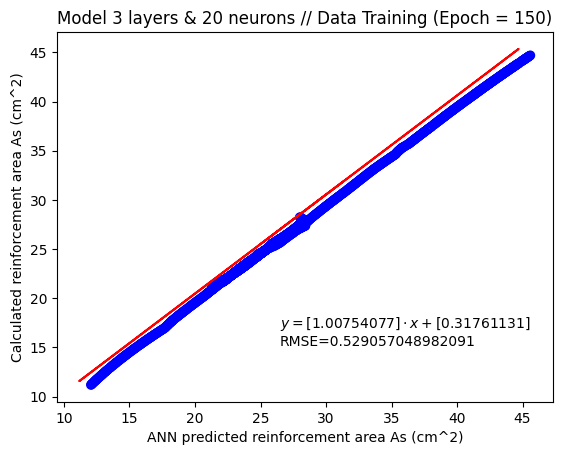

In [4]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
#Plotting
ypred1=mdl_Asopt.predict(xtrain)

RMSE=sqrt(mean_squared_error(ytrain1,ypred1))

# Coefficients
m, b = np.polyfit(ytrain1, ypred1, 1)

#Plotting scatter points and 1st-degree polynom
plt.scatter(ypred1,ytrain1,facecolors = 'none',edgecolors='b')
plt.plot(ytrain1, m*ytrain1 + b, color='red')

# Information Plot
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

20/20 [==============================] - 0s 7ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

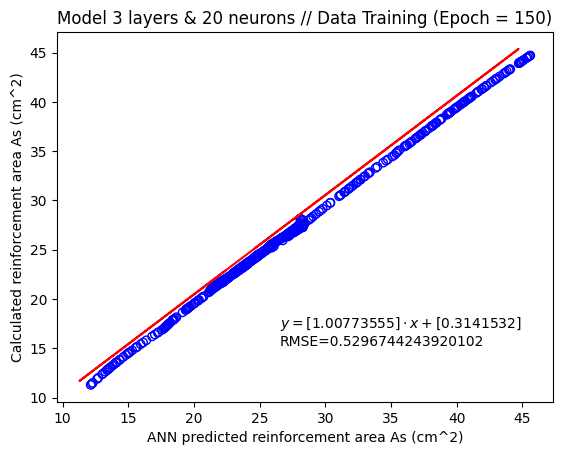

In [5]:
# TESTING PREDICTED VALUES VS TESTING VALUES
#Ploteando los Resultados
ypred1=mdl_Asopt.predict(xtest)
RMSE=sqrt(mean_squared_error(ytest1,ypred1))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest1, ypred1, 1)

plt.scatter(ypred1,ytest1,facecolors = 'none',edgecolors='b')
plt.plot(ytest1, m*ytest1 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

# PLOTEO DEL MODELO DE "d (cm)"

80/80 [==============================] - 1s 9ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

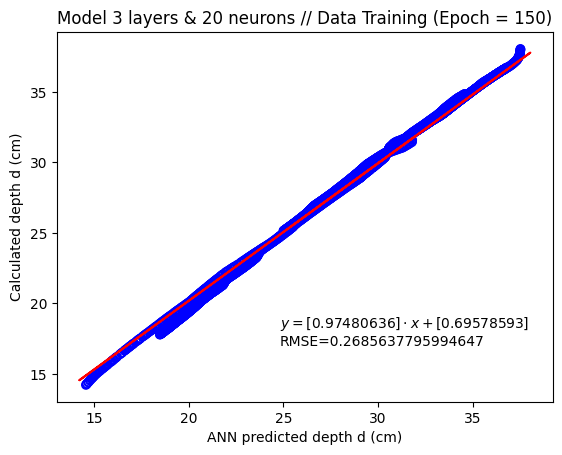

In [6]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
#Ploteando resultados
ypred2 = mdl_dopt.predict(xtrain)

RMSE = sqrt(mean_squared_error(ytrain2,ypred2))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain2, ypred2, 1)

plt.scatter(ypred2,ytrain2,facecolors = 'none',edgecolors='b')
plt.plot(ytrain2, m*ytrain2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')	

20/20 [==============================] - 0s 9ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

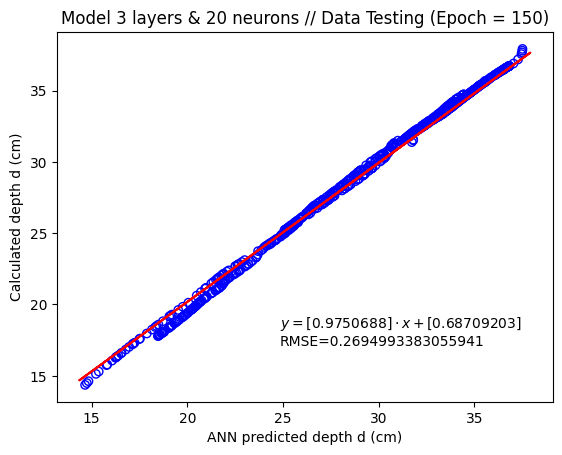

In [7]:
# TESTING PREDICTED VALUES VS TESTING VALUES
ypred = mdl_dopt.predict(xtest)

RMSE = sqrt(mean_squared_error(ytest2,ypred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest2, ypred, 1)

plt.scatter(ypred,ytest2,facecolors = 'none',edgecolors='b')
plt.plot(ytest2, m*ytest2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

# PLOTEO DEL MODELO DE Asopt_p

80/80 [==============================] - 1s 6ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

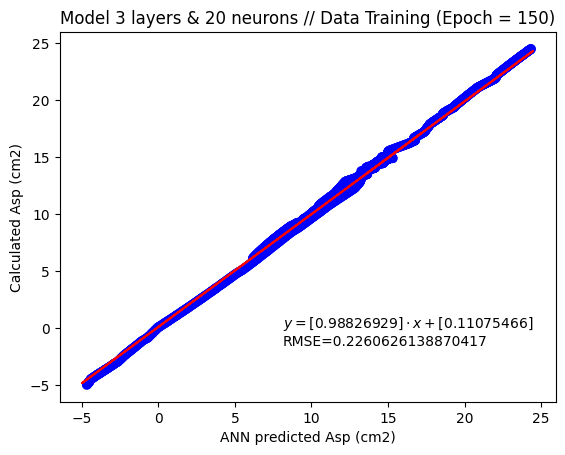

In [8]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
#Ploteando resultados
ypred3 = mdl_Asopt_p.predict(xtrain)

RMSE = sqrt(mean_squared_error(ytrain3,ypred3))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain3, ypred3, 1)

plt.scatter(ypred3,ytrain3,facecolors = 'none',edgecolors='b')
plt.plot(ytrain3, m*ytrain3 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted Asp (cm2)')
plt.ylabel('Calculated Asp (cm2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

20/20 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

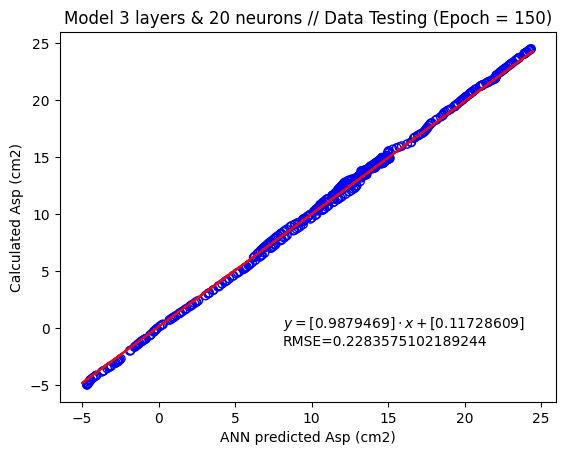

In [9]:
# TESTING PREDICTED VALUES VS TESTING VALUES
ypred3 = mdl_Asopt_p.predict(xtest)

RMSE = sqrt(mean_squared_error(ytest3,ypred3))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest3, ypred3, 1)

plt.scatter(ypred3,ytest3,facecolors = 'none',edgecolors='b')
plt.plot(ytest3, m*ytest3 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted Asp (cm2)')
plt.ylabel('Calculated Asp (cm2)')
plt.title('Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

In [11]:
import pandas as pd
#Datos de ETABS
fc = [21]
fy = [400]
Mu = [250]
b =  [250]

#Almacenamiento de datos del ETABS
data_Etabs        = pd.DataFrame()
data_Etabs ['fc'] = fc
data_Etabs ['fy'] = fy
data_Etabs ['Mu'] = Mu
data_Etabs ['b']  = b

#Evaluación en el Modelo entrenado por ANN
y_As  = mdl_Asopt.predict(data_Etabs)
y_d   = mdl_dopt.predict(data_Etabs)
y_Asp = mdl_Asopt_p.predict(data_Etabs)

imprimir = f"El Área de Acero (As) es {y_As} cm^2, el peralte efectivo (d) es {y_d} cm y el Área de Acero compresión (Asp) es {y_Asp}"
print(imprimir)

1/1 [==============================] - 0s 160ms/step
El Área de Acero (As) es [[25.482325]] cm^2, el peralte efectivo (d) es [[31.538187]] cm y el Área de Acero compresión (Asp) es [[13.383914]]
